<a href="https://colab.research.google.com/github/velish-qubadov/Machine-Learning/blob/main/Decision_Trees(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Classification Decision Tree (Təsnifat Qərar Ağacı)
Təsnifat üçün qərar ağacı verilən nümunələri müəyyən siniflərə ayırmaq üçün istifadə olunur.

**İş prinsipi:**

Hər düyündə məlumat bir xüsusiyyətə görə bölünür.

Hər bölünmə sonrası qovşaqlar (nodes) mümkün olan siniflərə yaxınlaşır.

Yarpaqlara çatanda qərar verilir (məsələn, “Spam” və ya “Spam deyil”).

**Bölünmə kriteriyaları:**

Gini Index: Bir qovşaqdakı qarışıqlığı (impurity) ölçür. Aşağı Gini dəyəri daha saf bölünmə deməkdir.

Entropy (Information Gain): Hər bölünmədə məlumatın nə qədər "düzgün" parçalandığını göstərir. Daha yüksək informasiya qazanımı (Information Gain) olan xüsusiyyətlər seçilir.

**📌 Məsələn:**
Bir e-poçt spam olub-olmamasını müəyyən edən ağac:

Sual: E-poçtda "free money" sözü var?

Bəli → Spam (Leaf Node)

Xeyr → Davam et (Başqa xüsusiyyətə görə bölünmə)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons= make_moons(n_samples=150, noise=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons,y_moons, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_clf.score(X_train,y_train), dt_clf.score(X_test, y_test)

(1.0, 0.8)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    'criterion':['entropy', 'gini'],
    'max_depth':[91,92,93,94,95],
    'min_samples_leaf' :[1,2,3,4,5,6,7,8,9]
}
gsc_dt_clf=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3)
gsc_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [91, 92, 93, 94, 95],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gsc_dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 91, 'min_samples_leaf': 1}

In [ ]:
gsc_dt_clf.best_estimator_.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=91)

In [ ]:
gsc_dt_clf.best_estimator_.score(X_train,y_train), gsc_dt_clf.best_estimator_.score(X_test,y_test)

(1.0, 0.9)

# Iris data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris(as_frame=True)
X_iris=iris.data[['petal length (cm)','petal width (cm)']].values
y_iris=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from pathlib import Path
IMAGES_PATH = Path() /'images'/'decision_trees'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH/ 'iris_tree.dot'),
    feature_names=['petal length (cm)','petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

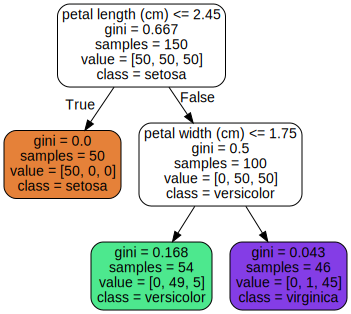

In [ ]:
from graphviz import Source
Source.from_file(IMAGES_PATH / 'iris_tree.dot')

#Estimating Class Probablities

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])

# Regularization Hyperparameters

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons= make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1= DecisionTreeClassifier(random_state=42)
tree_clf2= DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
X_moons_test, y_moons_test= make_moons(n_samples=150, noise=0.2, random_state=53)

In [ ]:
tree_clf1.score(X_moons_test,y_moons_test), tree_clf2.score(X_moons_test,y_moons_test)

(0.8666666666666667, 0.92)

#Regression

Reqressiya üçün qərar ağacı davamlı (continuous) dəyərləri proqnozlaşdırmaq üçün istifadə olunur.


**İş prinsipi:**

Verilənlər ortalama bir dəyərə əsasən bölünür.

Hər bölünmə zamanı məlumatın daha yaxşı uyğunlaşdığı dəyər tapılır.

Son yarpaq düyünlərində proqnozlaşdırılan qiymət olur.

**Bölünmə kriteriyası:**

Mean Squared Error (MSE): Hər qovşaqda MSE hesablanır və ən aşağı səhv verən bölünmə seçilir.

Mean Absolute Error (MAE): Hər qovşaqda orta məxfi səhv hesablanır.

**📌 Məsələn:**

Bir evin qiymətini təxmin edən ağac:

Sual: Evin sahəsi 100 m²-dən böyükdür?

Bəli → Ortalama qiymət: 150,000 $

Xeyr → Davam et (başqa kriteriya ilə bölünmə)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad= np.random.rand(200,1)-0.5  # a single random input feature
y_quad= X_quad**2 + 0.025* np.random.randn(200,1)
tree_reg=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

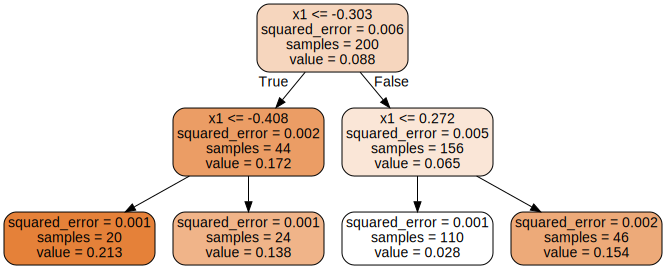

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH/ 'regression_tree.dot'),
    feature_names=['x1'],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / 'regression_tree.dot')